In [82]:
from scipy.io import arff
import numpy as mp
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report,precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [15]:

data = arff.loadarff('./Data/5year.arff')

df = pd.DataFrame(data[0])

df['class'].unique()

array([b'0', b'1'], dtype=object)

In [13]:
df = df.astype({"class": str})
df['class'] = df['class'].replace(['b\'0\'','b\'1\''], [0, 1])

In [42]:
df.isna().sum()[0:30]

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
Attr6       3
Attr7       3
Attr8      18
Attr9       1
Attr10      3
Attr11      3
Attr12     21
Attr13      0
Attr14      3
Attr15      6
Attr16     18
Attr17     18
Attr18      3
Attr19      0
Attr20      0
Attr21    103
Attr22      3
Attr23      0
Attr24    135
Attr25      3
Attr26     18
Attr27    391
Attr28    107
Attr29      3
Attr30      0
dtype: int64

In [40]:
df.isna().sum()[31:65]

Attr32      46
Attr33      21
Attr34      18
Attr35       3
Attr36       3
Attr37    2548
Attr38       3
Attr39       0
Attr40      21
Attr41      84
Attr42       0
Attr43       0
Attr44       0
Attr45     268
Attr46      21
Attr47      35
Attr48       3
Attr49       0
Attr50      18
Attr51       3
Attr52      36
Attr53     107
Attr54     107
Attr55       0
Attr56       0
Attr57       3
Attr58       0
Attr59       3
Attr60     268
Attr61      15
Attr62       0
Attr63      21
Attr64     107
class        0
dtype: int64

Attribute 37 looks particularly problematic given the large amount of missing values.

X37 (current assets - inventories) / long-term liabilities


In [52]:
df = df.drop('Attr37',axis=1).reset_index()

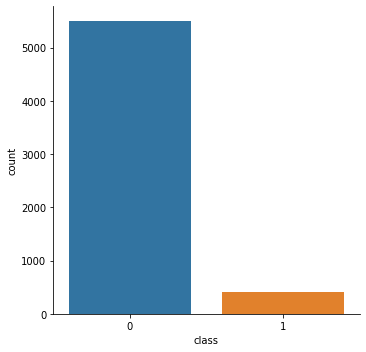

In [48]:
sns.catplot(x="class", kind="count", data=df)

The dataset is clearly imbalanced as most companies did not go bankrupt in the recorded time.

# really basic first models to try

In [77]:
# we can just try with the first few metrics and see how we do. First we have to remove the 3 rows where they are na
df_sub =  df.dropna(subset=['Attr1','Attr2','Attr3'])

X=df_sub[['Attr1','Attr2','Attr3']]

y=df_sub['class']

from sklearn.model_selection import train_test_split

# I will make a small test set here to act as the holdout data since I would like to use kfolds for the models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2, stratify=y)

#stratify should make sure the balance of 0 and 1 class is maintained in the random samples.

# Try Gaussian first

In [78]:
from sklearn.naive_bayes import GaussianNB

gb_m = GaussianNB()

gb_m.fit(X_train, y_train)

y_preds = gb_m.predict(X_test)

print('accuracy: ',np.mean(cross_val_score(gb_m, X_train, y_train, cv=5)))
print('precision: ',np.mean(cross_val_score(gb_m,X_train, y_train,scoring='precision')))
print('recall: ',np.mean(cross_val_score(gb_m,X_train, y_train,scoring='recall')))
print('F1: ',np.mean(cross_val_score(gb_m,X_train, y_train,scoring='f1')))


accuracy:  0.9311520805777379
precision:  0.5449999999999999
recall:  0.06253239540910774
F1:  0.1116636441355852


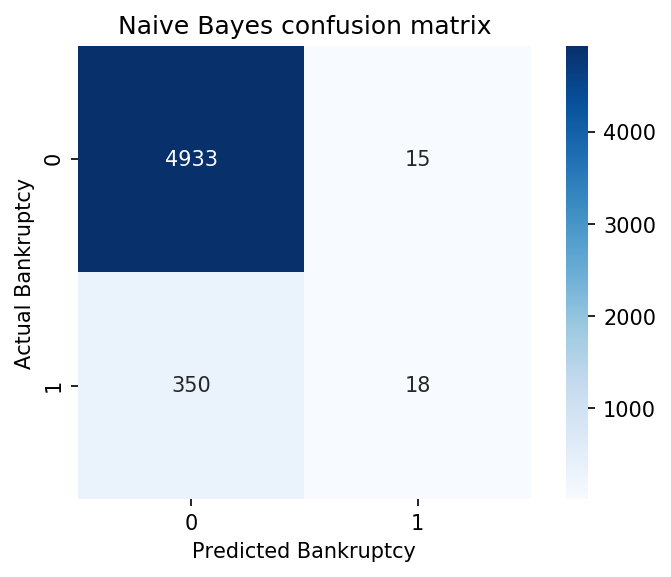

In [95]:
# Print confusion matrix for Gaussian
GNB_confusion = confusion_matrix(y_train, gb_m.predict(X_train))
plt.figure(dpi=150)
sns.heatmap(GNB_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('Naive Bayes confusion matrix');

Not very good on this front.

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

RF_m = RandomForestClassifier()

RF_m.fit(X_train, y_train)

y_preds = RF_m.predict(X_test)

print('accuracy: ',np.mean(cross_val_score(RF_m, X_train, y_train, cv=5)))
print('precision: ',np.mean(cross_val_score(RF_m,X_train, y_train,scoring='precision')))
print('recall: ',np.mean(cross_val_score(RF_m,X_train, y_train,scoring='recall')))
print('F1: ',np.mean(cross_val_score(RF_m,X_train, y_train,scoring='f1')))


accuracy:  0.9287068800882734
precision:  0.4504407464740282
recall:  0.14157719363198815
F1:  0.20379139614656472


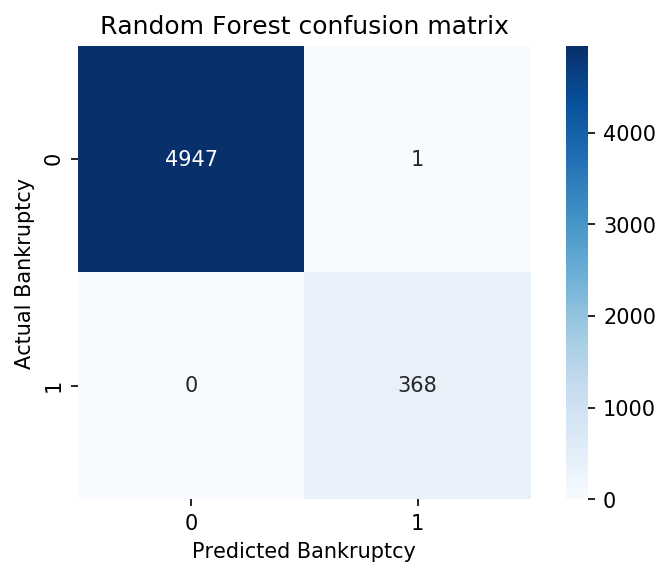

In [103]:
# Print confusion matrix for Gaussian
rf_confusion = confusion_matrix(y_train, RF_m.predict(X_train))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('Random Forest confusion matrix');

Well since that did so well I might as well try the out of sample data already...

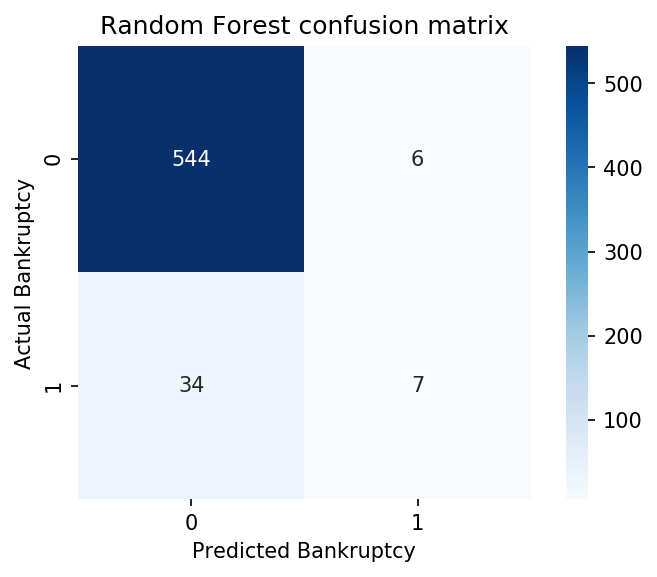

In [102]:
# Print confusion matrix for  Random Forest
rf_confusion = confusion_matrix(y_test, RF_m.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('Random Forest confusion matrix');

much less impressive.

In [108]:
response_d = {}


for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_preds = knn.predict(X_test)
    
    print(k,' Neighbors')
    print('accuracy: ',np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    print('precision: ',np.mean(cross_val_score(knn,X_train, y_train,scoring='precision')))
    print('recall: ',np.mean(cross_val_score(knn,X_train, y_train,scoring='recall')))
    print('F1: ',np.mean(cross_val_score(knn,X_train, y_train,scoring='f1')))

    


1  Neighbors
accuracy:  0.8937172423061417
precision:  0.20191830401152036
recall:  0.1821177341725287
F1:  0.19129301445011562
2  Neighbors
accuracy:  0.9256965320167776
precision:  0.2972804972804973
recall:  0.05435024065161052
F1:  0.09157149000250704
3  Neighbors
accuracy:  0.9200542513386004
precision:  0.3342851874292036
recall:  0.14950018511662347
F1:  0.2058464757704251
4  Neighbors
accuracy:  0.929647260201303
precision:  0.46591880341880343
recall:  0.07611995557201037
F1:  0.13036785537041004
5  Neighbors
accuracy:  0.927201882882182
precision:  0.4136812619784756
recall:  0.11417993335801555
F1:  0.17824970439923826
6  Neighbors
accuracy:  0.9294587597875215
precision:  0.4463120213120213
recall:  0.065272121436505
F1:  0.11331285058615721
7  Neighbors
accuracy:  0.9285189101634612
precision:  0.4495600414078675
recall:  0.10333209922251016
F1:  0.16718126725652574
8  Neighbors
accuracy:  0.9303993167302075
precision:  0.49428571428571433
recall:  0.06790077748981858
F1: 

lets try 3 neighbors which had the best f1 score.

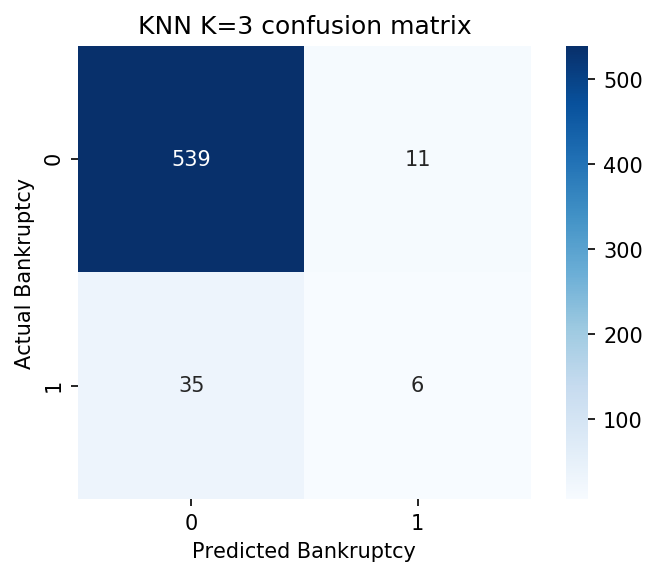

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



rf_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('KNN K=3 confusion matrix');
